# Machine Learning Exercise 2- Logistic Regression
This notebook covers a Python-based solution for exercise 2. [Here](ex/ex2.pdf) is detailed descriptions and equations.

In this exercise we'll implement logistic regression and apply it to a classification task. We'll also improve the robustness of our implementation by adding regularization to the training algorithm. and testing it on a more difficult problem.

## 1. Logistic Regression
In the first part of this exercise, we'll build a logistic regression model to predict whether a student gets admitted to a university. Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision. To accomplish this, we're going to build a classification model that estimates the probability of admission based on the exam scores.

### 1.1 Visualizing the data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
path = os.getcwd() + '/data/ex2/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


Let's create a scatter plot of the two scores and use color coding to visualize if the example is positive (admitted) or negative (not admitted).

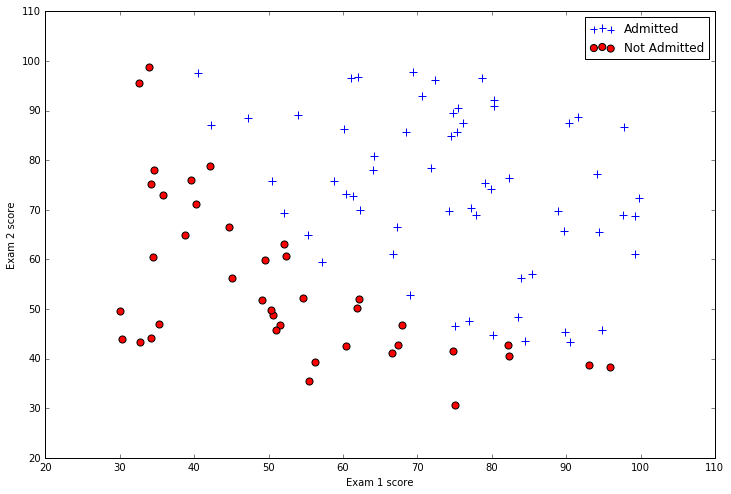

In [4]:
def plot_data():
    positive = data[data['Admitted'] == 1]
    negative = data[data['Admitted'] == 0]
    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='+', label='Admitted')
    ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='o', label='Not Admitted')
    ax.legend()
    ax.set_xlabel('Exam 1 score')
    ax.set_ylabel('Exam 2 score')
    plt.show()

plot_data()

### 1.2 Implementation

### - Sigmoid function

The logistic regression hypothesis is defined as: 
$$
h_\theta = g(\theta^Tx)
$$

where function $g$ is the sigmoid function which defined as:
$$
g(z) = \frac{1}{1+e^{-z}}
$$

First we need to create this sigmoid function:

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
# Check sigmoid function
sigmoid(0)

0.5

### - Cost function and gradient
Now we need to implement cost function and gradient.

Recall that the cost function in logistic regression is:
$$
J(\theta) = \frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}))]
$$

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element (for $j=0,1,...,n$) is defined as follows:
$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
$$


In [7]:
def cost_function(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    hx = sigmoid(X * theta.T)
    first = np.multiply(-y,np.log(hx))
    second = np.multiply((1-y), np.log(1 - hx))
    J = np.sum(first - second) / len(X)
    return J
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    grad_ = np.zeros(theta.shape)
    hx = sigmoid(np.dot(X, theta.T))
    grad_ = np.dot(X.T, hx-y) / len(X)
    return grad_[:,0]

Let's add a column of ones to the training set so we can use a vectorized solution to computing the cost and gradients.

In [8]:
data.insert(0, 'Ones', 1)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [9]:
X.head()

,Ones,Exam 1,Exam 2
0,1,34.623660,78.024693
1,1,30.286711,43.894998
2,1,35.847409,72.902198
3,1,60.182599,86.308552
4,1,79.032736,75.344376


In [10]:
y.head()

,Admitted
0,0
1,0
2,0
3,1
4,1


In [11]:
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [12]:
print('Cost at initial theta (all zeros): %f' %cost_function(theta, X, y))

Cost at initial theta (all zeros): 0.693147


In [13]:
print('Gradient at initial theta (all zeros): %s' %gradient(theta, X, y))

Gradient at initial theta (all zeros): [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


### - Learning parameters using scipy.optimize
In the exercise, an Octave function called `fminunc` is used to optimize the parameters given functions to compute the cost and the gradients. Since we're using Python, we can use SciPy's "optimize" namespace to do the same thing.

There are several function on scipy.optimize we can use e.g: fmin, fmin_tnc.

In [14]:
import scipy.optimize as opt


- Using fmin:

In [15]:
initial_theta = np.zeros((3,1))
fmin_result = opt.fmin(func=cost_function, x0=initial_theta, args=(X, y))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


The number of function evaluations when using fmin is 287.

In [16]:
print('Optimal cost (found by fmin): %f' % cost_function(fmin_result, X, y))
print('Parameters: %s' % fmin_result)

Optimal cost (found by fmin): 0.203498
Parameters: [-25.16130062   0.20623142   0.20147143]


- Using fmin_tnc

In [17]:
fmin_tnc_theta = opt.fmin_tnc(func=cost_function, x0=initial_theta, fprime=gradient, args=(X,y))
fmin_tnc_theta

(array([-25.1613186 ,   0.20623159,   0.20147149]), 36, 0)

The number of function evaluations when using fmin_tnc is 36. We can see that the evaluation converge faster when using `fmin_tnc` compare to `fmin`

In [18]:
print('Optimal cost (found by fmin_tnc): %f' % cost_function(fmin_tnc_theta[0], X, y))
print('Parameters: %s' % fmin_tnc_theta[0])

Optimal cost (found by fmin_tnc): 0.203498
Parameters: [-25.1613186    0.20623159   0.20147149]


### - Plot the decision boundary
The decision boundary is defined with equation: $\theta^T x = 0$.

In 2D dimensional, the equation can be expressed as: $\theta_0 + \theta_1x_1 + \theta_2x_2 = 0$

In [19]:
def plot_decision_boundary():
    positive = data[data['Admitted'] == 1]
    negative = data[data['Admitted'] == 0]
    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='+', label='Admitted')
    ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='g', marker='o', label='Not Admitted')
    plot_x = np.arange(np.min(X[:,1]), np.max(X[:,2]))
    plot_y = -(fmin_tnc_theta[0][0] + fmin_tnc_theta[0][1] * plot_x) / fmin_tnc_theta[0][2]
    ax.plot(plot_x, plot_y, c='r', label='Decision Boundary')
    ax.legend()
    ax.set_xlabel('Exam 1 score')
    ax.set_ylabel('Exam 2 score')
    plt.show()

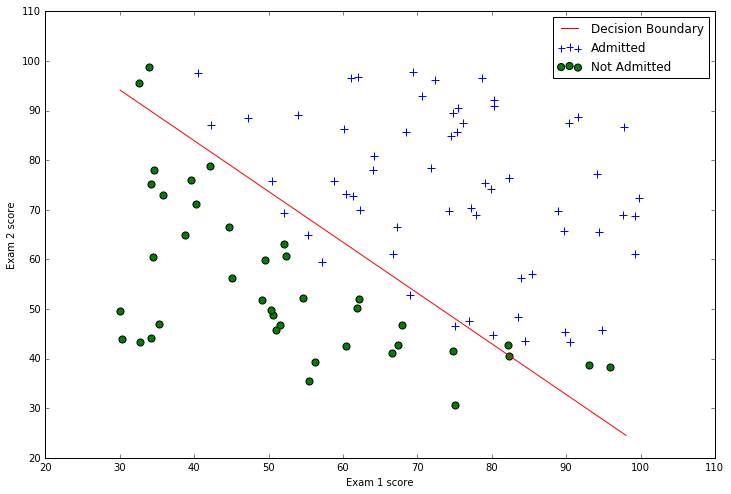

In [20]:
plot_decision_boundary()

### - Evaluating logistic regression
After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776.

In [21]:
student = np.array([1, 45, 85])
pre = sigmoid(np.dot(fmin_tnc_theta[0], student))
print(pre)

0.776290624493


Next we need to write a function that will output predictions for a dataset X using our learned parameters theta. We can then use this function to score the training accuracy of our classifier.

In [22]:
def predict(theta, X):
    prob = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in prob]

In [23]:
theta_min = np.matrix(fmin_tnc_theta[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = np.sum(correct) % len(correct)
print('Accuracy = %d' % accuracy + '%')

Accuracy = 89%


## 2. Regularized logistic regression

Now, we have already implemented a simple logistic regression. We are going to improve the algorithm by adding regularization. 

We will apply the algorithm to predict whether microchips from a fabrication plant passes quality essurance. The data we use is ex2data2.txt.

First take a look at the data

### - Visualizing the data

In [24]:
path = os.getcwd() + '/data/ex2/ex2data2.txt'
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])

In [25]:
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [26]:
data2.describe()

,Test 1,Test 2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [27]:
def plotdata2():
    positive = data2[data2['Accepted'] == 1]
    negative = data2[data2['Accepted'] == 0]
    
    plt.subplots(figsize=(12,8))
    plt.scatter(positive['Test 1'], positive['Test 2'], s=50, c='y', marker='o', label='Accepted')
    plt.scatter(negative['Test 1'], negative['Test 2'], s=50, c='b', marker='x', label='Rejected')
    plt.legend()
    
    plt.xlabel('Test 1 score')
    plt.ylabel('Test 2 score')
    plt.show()

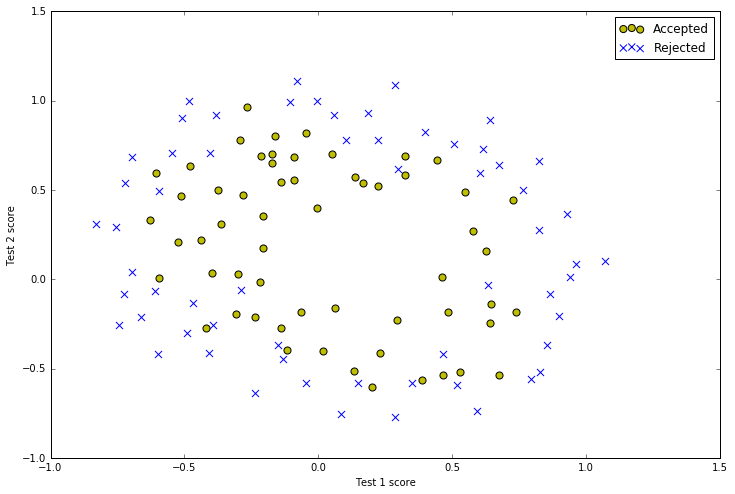

In [28]:
plotdata2()

This data looks a bit more complicated than the previous example. In particular, you'll notice that there is no linear decision boundary that will perform well on this data. One way to fit the data better is to create more features from each data point. We can do this with feature mapping.

### - Feature mapping

We will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power:
$$mapFeature(x) = \left[\begin{array},1 \\x_1 \\x_2 \\x_1^2 \\x_1x_2 \\x_2^2 \\x_1^3 \\ \vdots \\x_1x_2^5 \\x_2^6 \end{array}\right]$$

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have
a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.

While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. Regularization can help combat the overfitting problem.

In [29]:
def mapFeatures(degree=6):
    x1 = data2['Test 1']
    x2 = data2['Test 2']
    
    data2.insert(3, 'Ones', 1)
    
    for i in range(1, degree+1):
        for j in range(0, i+1):
            data2['F'+str(i)+str(j)] = np.power(x1, i-j)*np.power(x2,j)
    data2.drop('Test 1', axis=1, inplace=True)
    data2.drop('Test 2', axis=1, inplace=True)

In [30]:
mapFeatures()

In [31]:
data2.shape

(118, 29)

In [32]:
data2.head()

,Accepted,Ones,F10,F11,F20,F21,F22,F30,F31,F32,...,F53,F54,F55,F60,F61,F62,F63,F64,F65,F66
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


### - Cost function and gradient

Now you will implement code to compute the cost function and gradient for regularized logistic regression.

The regularized cost function in logistic regression is:
$$
J(\theta) = \frac{1}{m}\sum_{i=1}^m[-y^{(i)}log(h_\theta(x^{(i)})) -(1-y^{(i)})log(1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2
$$

Note that we do not regularize the parameter $\theta_0$. The gradient of the cost function is a vector where the $j^{th}$ element is define as follows:

$\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$ for $j = 0$

$\frac{\partial J(\theta)}{\partial \theta_j} = (\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}) + \frac{\lambda}{m}\theta_j$ for $j > 0$

In [33]:
def cost_reg(theta, X, y, _lambda):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    hx = sigmoid(X * theta.T)
    m = y.shape[0]
    J = 0
    first = np.multiply(-y, np.log(hx))
    second = np.multiply((1-y), np.log(1-hx))
    J = np.sum(first-second) / m
    J += _lambda * np.sum(np.power(theta[:,1:theta.shape[1]], 2)) / (2*m)
    return J

def gradient_reg(theta, X, y, _lambda):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    grad = np.dot(X.T, error) / len(X)
    
    temp = np.array(theta.T)
    temp[0] = 0
    reg = _lambda * temp /len(X)
    grad += reg
    return grad

Use initial value of $\theta$ (all zeros) and learning rate ($\lambda = 1$), you should see the cost is about 0.693

In [34]:
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

X2 = np.array(X2.values)
y2 = np.array(y2.values)

initial_theta = np.zeros(X2.shape[1])

learningRate = 1

In [35]:
cost_reg(initial_theta, X2, y2, learningRate)

0.6931471805599454

Now we create the gradient function with regularization

In [36]:
grad = gradient_reg(initial_theta, X2, y2, learningRate)
grad

matrix([[  8.47457627e-03],
        [  1.87880932e-02],
        [  7.77711864e-05],
        [  5.03446395e-02],
        [  1.15013308e-02],
        [  3.76648474e-02],
        [  1.83559872e-02],
        [  7.32393391e-03],
        [  8.19244468e-03],
        [  2.34764889e-02],
        [  3.93486234e-02],
        [  2.23923907e-03],
        [  1.28600503e-02],
        [  3.09593720e-03],
        [  3.93028171e-02],
        [  1.99707467e-02],
        [  4.32983232e-03],
        [  3.38643902e-03],
        [  5.83822078e-03],
        [  4.47629067e-03],
        [  3.10079849e-02],
        [  3.10312442e-02],
        [  1.09740238e-03],
        [  6.31570797e-03],
        [  4.08503006e-04],
        [  7.26504316e-03],
        [  1.37646175e-03],
        [  3.87936363e-02]])

### - Learning parameters

Similar to the previous part, we will use scipy.optimize to learning the optimal parameters

- Using fmin

In [37]:
fmin_theta = opt.fmin(cost_reg, x0=initial_theta, args=(X2, y2, learningRate))

fmin does not converage

- Using fmin_tnc

In [38]:
fmin_tnc_theta = opt.fmin_tnc(func=cost_reg, x0=initial_theta, fprime=gradient_reg, args=(X2, y2, learningRate))
fmin_tnc_theta

(array([ 1.27271028,  0.62529965,  1.18111686, -2.01987402, -0.91743189,
        -1.43166931,  0.12393227, -0.36553118, -0.35725407, -0.17516293,
        -1.4581701 , -0.05098418, -0.61558557, -0.27469166, -1.19271299,
        -0.24217839, -0.20603301, -0.04466176, -0.27778949, -0.29539514,
        -0.45645982, -1.04319154,  0.02779374, -0.29244865,  0.01555759,
        -0.32742404, -0.1438915 , -0.92467487]), 32, 1)

In [39]:
print('Optimal cost (found by fmin_tnc): %f' % cost_reg(fmin_tnc_theta[0], X2, y2, learningRate))
print('Parameters: %s' % fmin_tnc_theta[0])

Optimal cost (found by fmin_tnc): 0.529003
Parameters: [ 1.27271028  0.62529965  1.18111686 -2.01987402 -0.91743189 -1.43166931
  0.12393227 -0.36553118 -0.35725407 -0.17516293 -1.4581701  -0.05098418
 -0.61558557 -0.27469166 -1.19271299 -0.24217839 -0.20603301 -0.04466176
 -0.27778949 -0.29539514 -0.45645982 -1.04319154  0.02779374 -0.29244865
  0.01555759 -0.32742404 -0.1438915  -0.92467487]


### - Evaluation

In [40]:
theta_min = np.matrix(fmin_tnc_theta[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = %d' % accuracy+'%')

accuracy = 98%


### - Draw decision boundary